In [12]:
from time import time

import pymc3 as pm

from bayesumis.umis_math_model import UmisMathModel
from bayesumis.umis_diagram import UmisDiagram
from stafdb.staf_factory import StafFactory
from testhelper.posterior_plotters import display_parameters

In [13]:
def make_stafids_from_ranges(ranges):
    stafids = []
    for (l, u) in ranges:
        str_range = [str(x) for x in range(l, u+1)]
        stafids = stafids + str_range
    return stafids

In [14]:
staf_factory = StafFactory('csvs_zinc_cycle_graedal_2005_united_kingdom')

# stafs [1-2] are external inflows
# stafs [3-8, 11-16, 18-22] are internal stafs
# stafs [9-10, 17] are external outflows
external_inflow_stafids = make_stafids_from_ranges([(1,2)])
internal_stafs_stafids = make_stafids_from_ranges([(3,8), (11,16), (18,22)])
external_outflow_stafids = make_stafids_from_ranges([(9,10), (17,17)])


In [15]:
external_inflows = staf_factory.build_stafs(external_inflow_stafids)
internal_stafs = staf_factory.build_stafs(internal_stafs_stafids)
external_outflows = staf_factory.build_stafs(external_outflow_stafids)

ref_material = staf_factory.build_material('1')
ref_timeframe = staf_factory.build_timeframe('1')

In [16]:
umis_diagram = UmisDiagram(
    external_inflows,
    internal_stafs,
    external_outflows
)

In [17]:
res_inflows = umis_diagram.get_external_inflows()
res_dict = umis_diagram.get_process_stafs_dict()
res_outflows = umis_diagram.get_external_outflows()

In [18]:
print("Inflows")
for x in res_inflows:
    print(x)
    
print()
print()

print("Internal Stafs")
for key, values in res_dict.items():
    print(key)
    for val in values.flows:
        print(val)
    print()
    if values.stock is not None:
        print(values.stock)
    print("----------------")
    
print()
print()

print("Outflows")
for x in res_outflows:
    print(x)

Inflows
Staf: Imported Refined Zinc, ID: 2
Staf: Concentrate, ID: 1


Internal Stafs
Process: Production: Mill, Smelter, Refinery – Transformation, STAFDB ID: 2
Staf: Distributed Production, ID: 3

Staf: Production Stock, ID: 7
----------------
Process: Production: Mill, Smelter, Refinery – Distribution, STAFDB ID: 3
Staf: Production Refined Zinc, ID: 5
Staf: Slag, ID: 6
Staf: Production Mass Balance, ID: 4

----------------
Process: Production: Mass balance, STAFDB ID: 5

----------------
Process: Fabrication and Manufacturing – Transformation, STAFDB ID: 6
Staf: Distributed Fabrication and Manufacturing, ID: 8

----------------
Process: Environment, STAFDB ID: 14

Staf: Dissipation to Environment, ID: 22
----------------
Process: Fabrication and Manufacturing – Distribution, STAFDB ID: 7
Staf: Products, ID: 11
Staf: Fabrication and Manufacturing Discards, ID: 12

----------------
Process: Use – Transformation, STAFDB ID: 8
Staf: Distributed Use, ID: 13

Staf: Use stock, ID: 14
------

In [19]:
math_model = UmisMathModel(
    res_inflows,
    res_dict,
    res_outflows,
    ref_material,
    ref_timeframe)

/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


Adding stock input to process 2_2


In [22]:
sample_size = 3000
start_time = time()
with math_model.pm_model:
    trace = pm.sample(sample_size, init='adapt_diag')
end_time = time()
print('Time taken %d' % (end_time - start_time))

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Stock Input-4_2_2_2, Inflow-1_1_2_2, Inflow-1_1_6_2, P_12_2, TC-8_2_9_2, P_7_2, P_3_2]
Sampling 2 chains: 100%|██████████| 7000/7000 [07:48<00:00, 14.93draws/s]
There were 44 divergences after tuning. Increase `target_accept` or reparameterize.
There were 37 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8859222298339763, but should be close to 0.8. Try to increase the number of

Time taken 477


In [23]:
map_estimate = pm.find_MAP(model=math_model.pm_model)

/home/tom/.local/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[t

In [24]:
"""
Functions to plot specific stock values, flow values and transfer
coefficients
"""

import math
import matplotlib.pyplot as plt
import seaborn as sns


def get_staf_samples(staf, varname, trace, math_model):
    row, col = math_model.get_staf_inds(staf)
    staf_samples = trace[varname][:, row, col]
    return staf_samples


def get_input_samples(staf, varname, trace, math_model):
    row, col = math_model.get_input_inds(staf)
    staf_samples = trace[varname][:, row, col]
    return staf_samples


def make_samples_dict(
        external_inflows,
        internal_stafs,
        external_outflows,
        trace,
        math_model):
    samples_dict = {}

    samples_dict['External Inflows'] = {}
    samples_dict['External Inflows']['Stafs'] = {}
    samples_dict['External Inflows']['CCs'] = {}

    for flow in external_inflows:
        input_staf_name = flow.name
        staf_samples = get_input_samples(
            flow, math_model.INPUT_VAR_NAME, trace, math_model)
        samples_dict['External Inflows']['Stafs'][input_staf_name] = \
            staf_samples

        input_cc_name = "Input Flow CC: " + flow.name
        cc_samples = get_input_samples(
            flow, math_model.INPUT_CC_VAR_NAME, trace, math_model)

        samples_dict['External Inflows']['CCs'][input_cc_name] = \
            cc_samples
        
    samples_dict['Internal Stafs'] = {}
    samples_dict['Internal Stafs']['Stafs'] = {}
    samples_dict['Internal Stafs']['TCs'] = {}
    samples_dict['Internal Stafs']['CCs'] = {}
    for staf in internal_stafs:
        staf_name = staf.name

        if staf.origin_process.process_type == 'Storage':
            staf_samples = get_input_samples(
                staf, math_model.INPUT_VAR_NAME, trace, math_model)

            cc_samples = get_input_samples(
                staf, math_model.INPUT_CC_VAR_NAME, trace, math_model)

            samples_dict['Internal Stafs']['TCs'][staf_name] = [0]

        else:
            staf_samples = get_staf_samples(
                staf, math_model.STAF_VAR_NAME, trace, math_model)

            cc_samples = get_staf_samples(
                staf, math_model.STAF_CC_VAR_NAME, trace, math_model)

            tc_samples = get_staf_samples(
                staf, math_model.TC_VAR_NAME, trace, math_model)

            samples_dict['Internal Stafs']['TCs'][staf_name] = tc_samples

        samples_dict['Internal Stafs']['Stafs'][staf_name] = staf_samples
        samples_dict['Internal Stafs']['CCs'][staf_name] = cc_samples

    samples_dict['External Outflows'] = {}
    samples_dict['External Outflows']['Stafs'] = {}
    samples_dict['External Outflows']['TCs'] = {}
    samples_dict['External Outflows']['CCs'] = {}
    for flow in external_outflows:
        staf_name = flow.name

        staf_samples = get_staf_samples(
            flow, math_model.STAF_VAR_NAME, trace, math_model)

        tc_samples = get_staf_samples(
            flow, math_model.TC_VAR_NAME, trace, math_model)

        cc_samples = get_staf_samples(
            flow, math_model.STAF_CC_VAR_NAME, trace, math_model)

        samples_dict['External Outflows']['Stafs'][staf_name] = staf_samples
        samples_dict['External Outflows']['TCs'][staf_name] = tc_samples
        samples_dict['External Outflows']['CCs'][staf_name] = cc_samples
    return samples_dict


def print_estimated_values(param_type, param_dict):
    print("Expected values of: " + param_type + "\n")
    for name, estimated_value in param_dict.items():
        print(name + ": " + str(estimated_value))
    print()


def get_staf_estimates(staf, varname, map_estimate, math_model):
    row, col = math_model.get_staf_inds(staf)
    estimates = map_estimate[varname][row, col]
    return estimates


def get_input_estimates(staf, varname, map_estimate, math_model):
    row, col = math_model.get_input_inds(staf)
    estimates = map_estimate[varname][row, col]
    return estimates


def make_estimates_dict(
        external_inflows,
        internal_stafs,
        external_outflows,
        map_estimate,
        math_model):
    estimates_dict = {}
    
    estimates_dict['External Inflows'] = {}
    for flow in external_inflows:
        flow_varname = "Input Flow: " + flow.name
        estimates = get_input_estimates(
            flow, math_model.INPUT_VAR_NAME, map_estimate, math_model)
        estimates_dict['External Inflows'][flow_varname] = estimates
        
    estimates_dict['Internal Stafs'] = {}
    for staf in internal_stafs:
        staf_name = "Internal Staf: " + staf.name
        if staf.origin_process.process_type == 'Storage':

            staf_estimates = get_input_estimates(
                    staf, math_model.INPUT_VAR_NAME, map_estimate, math_model)

        else:
            staf_estimates = get_staf_estimates(
                staf, math_model.STAF_VAR_NAME, map_estimate, math_model)

            tc_name = "TC: " + staf.name
        
            tc_estimates = get_staf_estimates(
                staf, math_model.TC_VAR_NAME, map_estimate, math_model)

            estimates_dict['Internal Stafs'][tc_name] = tc_estimates

        estimates_dict['Internal Stafs'][staf_name] = staf_estimates

    estimates_dict['External Outflows'] = {}
    for flow in external_outflows:
        staf_name = "Output Flow: " + flow.name
        tc_name = "TC: " + flow.name
        staf_estimates = get_staf_estimates(
            flow, math_model.STAF_VAR_NAME, map_estimate, math_model)

        tc_estimates = get_staf_estimates(
            flow, math_model.TC_VAR_NAME, map_estimate, math_model)

        estimates_dict['External Outflows'][staf_name] = staf_estimates
        estimates_dict['External Outflows'][tc_name] = tc_estimates

    return estimates_dict


def plot_posteriors(samples_dict):
    for umis_type, staf_dict in samples_dict.items():
        param_dict = list(staf_dict.values())[0]
        num_params = len(param_dict.values())
        plot_width = 3
        plot_height = num_params
        fig = plt.figure(
            figsize=(plot_width*5, plot_height*4), facecolor='w')
        plot_col_ind = 1
        for param_type, param_dict in staf_dict.items():
            plot_row_ind = 0
            for name, samples in param_dict.items():
                title = "{}: {}".format(param_type, name)
                i = plot_row_ind*plot_width + plot_col_ind
                ax = fig.add_subplot(plot_height, plot_width, i, title=title)
                try:
                    sns.kdeplot(samples, axes=ax)
                except Exception:
                    ax.hist(samples)
                plot_row_ind = plot_row_ind+1
            plot_col_ind = plot_col_ind+1
        fig.suptitle(umis_type, y=1.08)
        plt.tight_layout(pad=0.4)


def display_estimates(estimates_dict):
    for param_type, param_dict in estimates_dict.items():
        print("Estimates of: " + param_type + "\n")
        for name, estimate in param_dict.items():
            print(name + ": " + str(estimate))
        print()
        print()


def display_parameters(
        external_inflows,
        internal_flows,
        external_outflows,
        trace,
        map_estimate,
        math_model):
    samples_dict = make_samples_dict(
        external_inflows,
        internal_flows,
        external_outflows,
        trace,
        math_model)

    try:
        estimates_dict = make_estimates_dict(
            external_inflows,
            internal_flows,
            external_outflows,
            map_estimate,
            math_model)

        display_estimates(estimates_dict)

    except Exception:
        print("Couldn't do map")

    plot_posteriors(samples_dict)


def print_umis_diagram(res_inflows, res_dict, res_outflows):
    for x in res_inflows:
        print(x)
    
    print()
    print()

    for key, values in res_dict.items():
        print(key)
        for val in values.flows:
            print(val)
        print("stock: {}".format(values.stock))
        print()
        
    print()
    print()

    for x in res_outflows:
        print("Outflows")
        print(x)


def plot_var(trace, var_name, row=None, col=None):
    if row is not None:
        samples = trace[var_name, :, row, col]
    else:
        samples = trace[var_name]

    fig = plt.figure()
    ax = fig.add_subplot(111, title=var_name)
    try:
        sns.kdeplot(samples, axes=ax)
    except Exception as e:
        print(e)
        ax.hist(samples)
    plt.show()



Estimates of: External Inflows

Input Flow: Concentrate: 120.02103404140426
Input Flow: Imported Refined Zinc: 111.37538358115876


Estimates of: Internal Stafs

TC: Distributed Production: 1.0
Internal Staf: Distributed Production: 131.02093765675204
TC: Production Mass Balance: 0.12093602652653648
Internal Staf: Production Mass Balance: 15.845151591988648
TC: Production Refined Zinc: 0.8409033318458755
Internal Staf: Production Refined Zinc: 110.17594301713353
TC: Slag: 0.038160641627588004
Internal Staf: Slag: 4.999843047629865
Internal Staf: Production Stock: 4.999887568153853
TC: Distributed Fabrication and Manufacturing: 1.0
Internal Staf: Distributed Fabrication and Manufacturing: 243.55948152333588
TC: Products: 0.7047131489644889
Internal Staf: Products: 171.6395691844683
TC: Fabrication and Manufacturing Discards: 0.20101892190677093
Internal Staf: Fabrication and Manufacturing Discards: 48.96006439599307
TC: Distributed Use: 0.7502528065496172
Internal Staf: Distributed Use:

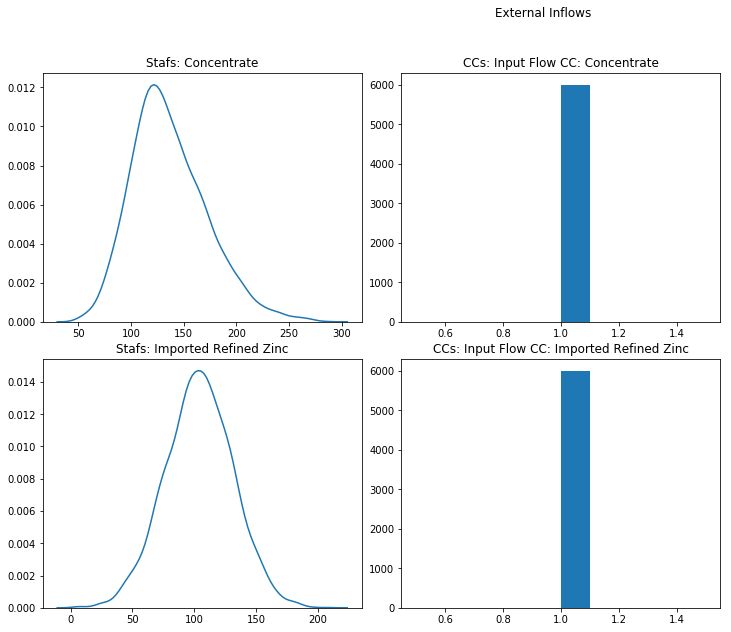

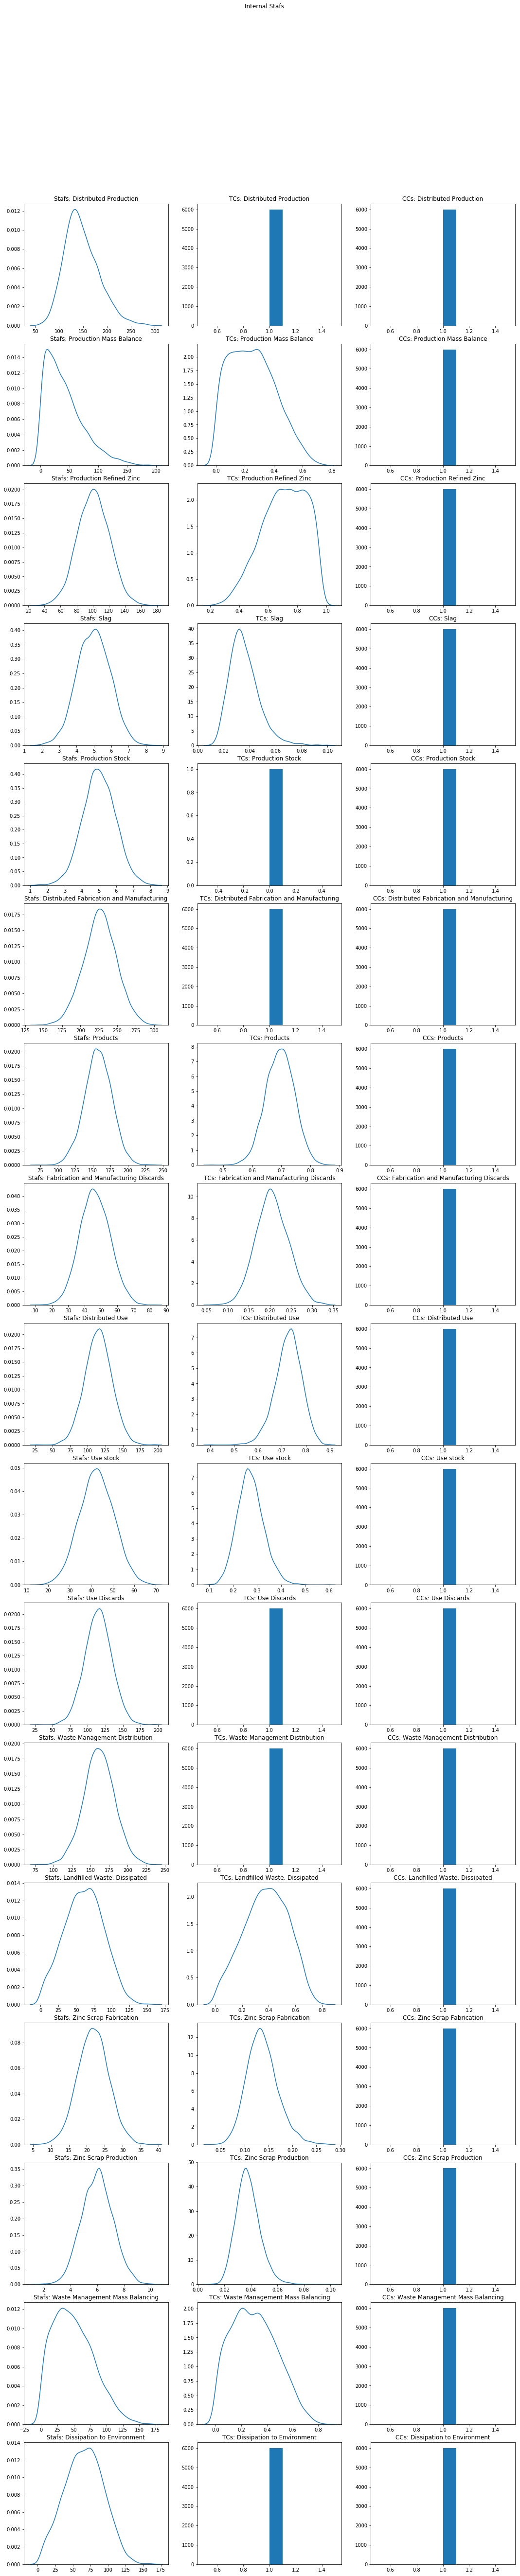

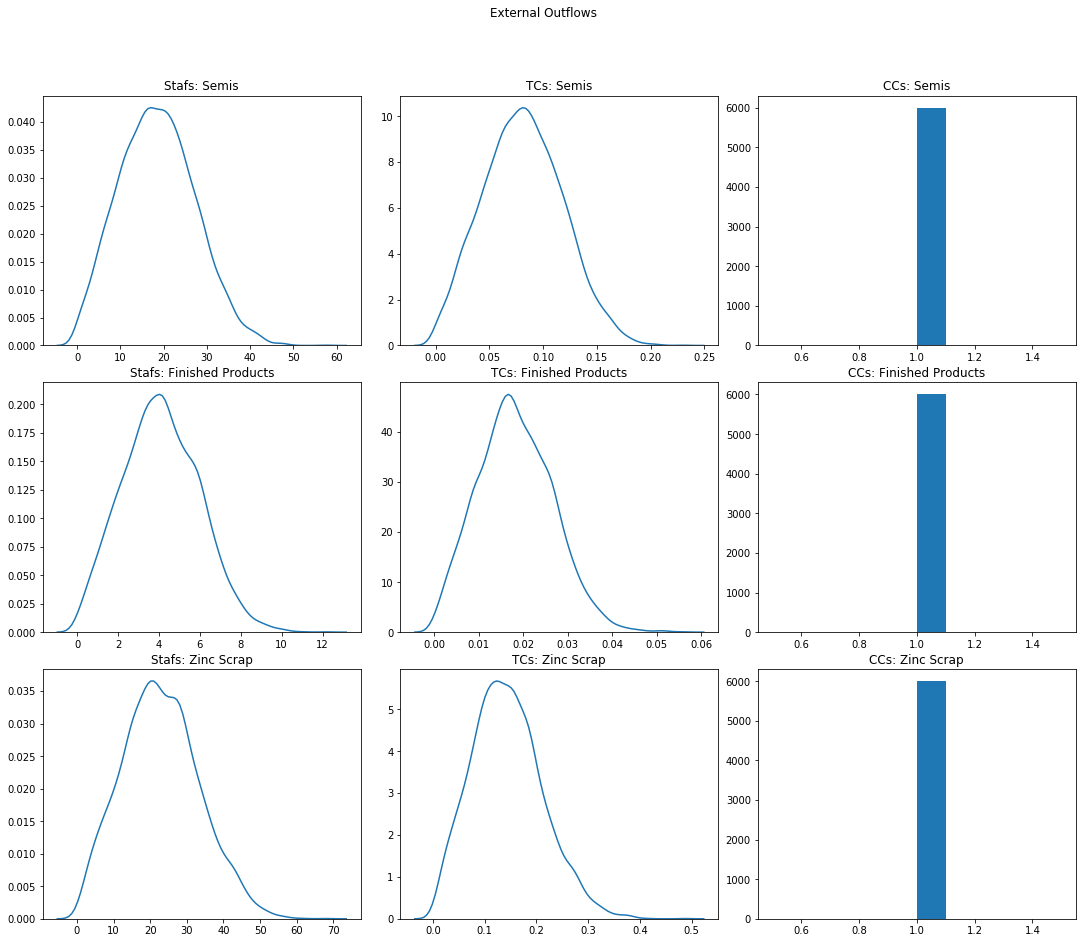

In [25]:
display_parameters(external_inflows, internal_stafs, external_outflows, trace, map_estimate, math_model)

In [26]:
accept = trace.get_sampler_stats('mean_tree_accept')
print(accept.mean())

0.8644552630973258
